# SI 618 - Homework #7: Classifiers
or: How I Learned to Stop Worrying and Love Machine Learning

Version 2023.11.08.1.CT

This is, perhaps, one of the most exciting homework assignments that you have encountered in this course!

You are going to try your hand at a Kaggle competition to predict which passengers on board the Spaceship Titanic are transported to an alternate dimension.

You can access the competition here: **https://www.kaggle.com/c/spaceship-titanic**

This assignment is similar to the Kaggle competition that we did in class, but it uses a different and larger dataset.

The basic steps for this assignment are the same as what we did in class:

1. Accept the rules and join the competition
2. Download the data (from the data tab of the competition page)
3. Understand the problem
4. EDA (Exploratory Data Analysis)
5. Train, tune, and ensemble (!) your machine learning models
6. Upload your prediction as a submission on Kaggle and receive an accuracy score

additionally, you will

7. Upload your final notebook to Canvas and report your best accuracy score.  

Note that class grades are not entirely dependent on your accuracy score.  
All models that achieve 80% accuracy will receive full points for 
the accuracy component of this assignment.

Rubric:

1. (20 points) Conduct an EDA. You must demonstrate that you understand the data and the problem.
2. (60 points) Train, tune, and ensemble machine learning models.  You must use at least 3 different models, and you must ensemble them in some way.  You must also tune your models to improve accuracy.
4. (10 points) Accuracy score based on Kaggle submission report (or alternative, see NOTE above).
5. (10 points) PEP-8, grammar, spelling, style, etc.

Some additional notes:

1. If you use another notebook, code, or approaches be sure to reference the original work. (Note that we recommend you study existing Kaggle notebooks before starting your own work.)
2. You can help each other but in the end you must submit your own work, both to Kaggle and to Canvas.

Some additional resources:

* "ensemble" your models with a [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)
* a good primer on [feature engineering](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)
* There are a lot of good [notebooks to study](https://www.kaggle.com/competitions/spaceship-titanic/code) (check the number of upvotes to help guide your exploration), but be careful to cite any code that you use, and be careful to not accidentally (or intentionally) cheat.

## GOOD LUCK!
(and don't cheat)

One final note:  Your submission should be a self-contained notebook that is NOT based
on this one.  Studying the existing Kaggle competition notebooks should 
give you a sense of what makes a "good" notebook.

In [ ]:
pip install xgboost


: 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import base64
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import gc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, 
                              ExtraTreesClassifier, VotingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn import datasets, linear_model
# import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)   

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# import eli5
# from eli5.sklearn import PermutationImportance



In [3]:
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')

In [4]:
train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3863,4142_01,Europa,True,C/148/S,TRAPPIST-1e,43.0,False,0.0,0.0,NaN,0.0,0.0,Maiah Deryplinet,True
4803,5128_01,Mars,False,F/1045/P,TRAPPIST-1e,65.0,False,56.0,0.0,1081.0,21.0,0.0,Forn Frazo,False
762,0799_01,Europa,False,A/6/P,55 Cancri e,NaN,False,0.0,3462.0,5.0,1590.0,4.0,Genibah Presstic,False
5114,5466_01,Europa,True,B/185/P,55 Cancri e,41.0,False,0.0,0.0,0.0,0.0,0.0,Mesons Matoltuble,True
3997,4258_01,Europa,False,A/37/P,TRAPPIST-1e,39.0,False,0.0,266.0,0.0,1254.0,197.0,Misa Perneernal,False
8619,9196_03,Europa,False,C/339/S,TRAPPIST-1e,23.0,False,381.0,794.0,52.0,654.0,1317.0,Chellus Poustive,False
6525,6893_01,Europa,True,B/261/S,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Winork Dreamspric,True
240,0257_02,Mars,True,F/49/S,TRAPPIST-1e,60.0,False,0.0,0.0,0.0,0.0,0.0,Squars Berte,True
785,0823_02,Earth,False,NaN,55 Cancri e,42.0,False,0.0,0.0,739.0,0.0,0.0,Wenten Carrishley,True
1314,1391_03,Mars,False,F/276/P,NaN,44.0,False,485.0,2.0,210.0,0.0,351.0,Frunch Apie,False


<font color=magenta size=5>
1. EDA
</font>

In [5]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

So, there are 6 continuous variables(Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck).

4 are categorical (HomePlanet, CryoSleep, Destination, VIP) excluding the target column - Transported

3 are descriptive (PassengerId, Cabin, Name).

In [6]:
print(train.isnull().sum())
# sns.heatmap(train.isnull())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [8]:
print(test.isnull().sum())
# sns.heatmap(test.isnull())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [9]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

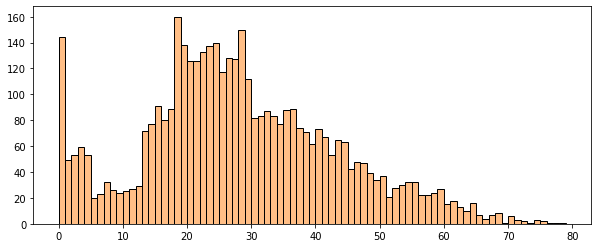

In [10]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

Notes:

0-18 year olds were more likely to be transported than not.

18-25 year olds were less likely to be transported than not.

Over 25 year olds were about equally likely to be transported than not.

Insight:

Create a new feature that indicates whether the passanger is a child, adolescent or adult.

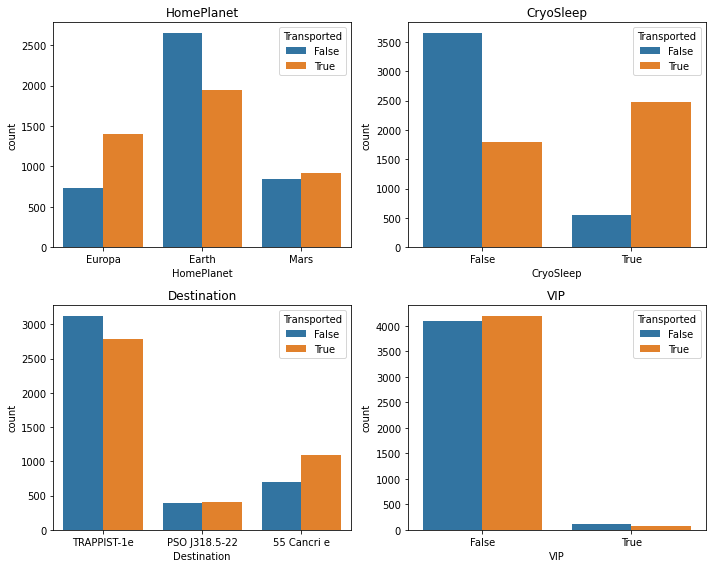

In [11]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,8))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(2,2,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

Notes:

VIP does not appear to be a useful feature; the target split is more or less equal.<br>
CryoSleep appears to be a very useful feature in contrast.

Insights:<br>
Might consider dropping the VIP column.

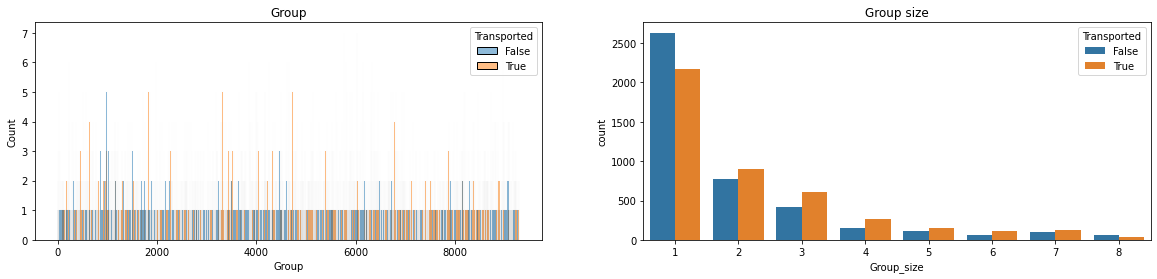

In [12]:
# New feature - Group
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
# test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
train['Group_size']=train['Group'].map(lambda x: train['Group'].value_counts()[x])
# test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

In [13]:
analys = train.loc[:,['HomePlanet','Destination']]
analys['numeric']=1
analys.groupby(['Destination','HomePlanet']).count()

numeric
Destination   HomePlanet         
55 Cancri e   Earth           690
              Europa          886
              Mars            193
PSO J318.5-22 Earth           712
              Europa           19
              Mars             49
TRAPPIST-1e   Earth          3101
              Europa         1189
              Mars           1475

<font color=magenta size=5>
2. Preprocessing datasets:<br>
-> Filling Missing values in train and test data sets using simple imputer.<br>
-> Standard scaling and one hot encoding.
</font>

In [14]:
Expenses_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train['Expenses'] = train.loc[:,Expenses_columns].sum(axis=1)
test['Expenses'] = test.loc[:,Expenses_columns].sum(axis=1)

In [15]:
train.loc[:,['Cabin_1']] = train.Cabin.str.split("/",expand=True).iloc[:,0]
train.loc[:,['Cabin_2']] = train.Cabin.str.split("/",expand=True).iloc[:,1]
train.loc[:,['Cabin_3']] = train.Cabin.str.split("/",expand=True).iloc[:,2]

test.loc[:,['Cabin_1']] = test.Cabin.str.split("/",expand=True).iloc[:,0]
test.loc[:,['Cabin_2']] = test.Cabin.str.split("/",expand=True).iloc[:,1]
test.loc[:,['Cabin_3']] = test.Cabin.str.split("/",expand=True).iloc[:,2]

In [16]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Group             int32
Group_size        int64
Expenses        float64
Cabin_1          object
Cabin_2          object
Cabin_3          object
dtype: object

In [17]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_size,Expenses,Cabin_1,Cabin_2,Cabin_3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,2,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,1091.0,F,1,S


In [18]:
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','Expenses','Age']
cat_cols = ['CryoSleep','Cabin_1','Cabin_3','VIP','HomePlanet','Destination']
transported=['Transported']

numeric_transformer = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False))
])

preprocessor=ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
    ])

In [19]:
X=train.drop('Transported', axis=1)
y=train['Transported']
X_transformed=preprocessor.fit_transform(X)

In [20]:
test_transformed=preprocessor.transform(test)

In [22]:
# Define classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)
xgb_classifier = xgb.XGBClassifier()

# Define parameter grids for grid search
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
svm_param_grid = {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']}
xgb_param_grid = {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 200]}

# Perform grid search for each classifier
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=5)

# Fit the grid search models
rf_grid_search.fit(X_transformed, y)
svm_grid_search.fit(X_transformed, y)
xgb_grid_search.fit(X_transformed, y)

# Get the best models from grid search
best_rf_model = rf_grid_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

# Create a voting classifier with the best models
voting_classifier = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('svm', best_svm_model),
    ('xgb', best_xgb_model)
], voting='soft')  # 'soft' for soft voting, 'hard' for hard voting

# Fit the voting classifier on the training data
voting_classifier.fit(X_transformed, y)

# Make predictions on the test data
y_pred = voting_classifier.predict(test_transformed)

# Evaluate the accuracy
accuracy = accuracy_score(y, y_pred = voting_classifier.predict(X_transformed))
print(f'Ensemble Training Accuracy: {accuracy:.4f}')

Ensemble Training Accuracy: 0.8378


In [23]:
def get_score(model,X,y):
    n = cross_val_score(model,X,y,scoring ='accuracy',cv=20)
    return n

params_XGB_best ={'lambda': 3.0610042624477543, 
             'alpha': 4.581902571574289, 
             'colsample_bytree': 0.9241969052729379, 
             'subsample': 0.9527591724824661, 
             'learning_rate': 0.06672065863100594, 
             'n_estimators': 725,
             'max_depth': 5, 
             'min_child_weight': 1, 
             'num_parallel_tree': 1}


In [24]:
print(get_score(xgb.XGBClassifier(**params_XGB_best),X_transformed,y).mean())

0.8076622172784577


In [25]:
pred_XGB_best = (xgb.XGBClassifier(**params_XGB_best).fit(X_transformed,y)).predict(test_transformed)
sample['Transported'] = pred_XGB_best
sample['Transported']=sample['Transported']>0.5
sample.to_csv('Sudhanshu_Agarwal_Submission.csv', index=False)

<font color=magenta size=4>
Score on Kaggle: 0.80009

In [26]:
sample['Transported'] = y_pred
sample.to_csv('Ensemble_best.csv', index=False)

<font color=magenta size=4>
Score on Kaggle: 0.80219